<h2 style="text-align: center;"><strong>Differential Privacy Strategies for Data Analytics in the Banking Sector</strong></h2>

<div style="text-align: center;">
  Universidad de los Andes<br>
  Author: Daniela Espinosa 202022615<br>
</div>


### **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Users/danie/OneDrive/Documentos/1 UNIANDES/10 semestre/Tesis/differential-privacy-banking-sector/data/raw/bank-full.csv', sep=';')
data.shape

In [ ]:
# Configuración de estilos para matplotlib y seaborn
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

# Define color palette
colors = ["#0b4e9e", "#ffc203"]  # Blue and Yellow
sns.set_palette(colors)

# Definición de columnas
columnas_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
columnas_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
# Histogramas segmentados por la variable objetivo (y)
fig, axs = plt.subplots(nrows=(len(columnas_numericas) + 2) // 3, ncols=3, figsize=(18, 12))
fig.suptitle("Histogramas de Columnas Numéricas por Variable Objetivo (y)", fontsize=16, weight="bold", y=1.02)

for i, col in enumerate(columnas_numericas):
    row, col_pos = divmod(i, 3)
    sns.histplot(data, x=col, hue='y', element='step', kde=True, ax=axs[row, col_pos])
    axs[row, col_pos].set_title(f'Histograma de {col}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


In [ ]:
# Boxplots por variable objetivo (y)
fig, axs = plt.subplots(nrows=(len(columnas_numericas) + 2) // 3, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots de Columnas Numéricas por Variable Objetivo (y)", fontsize=16, weight="bold", y=1.02)

for i, col in enumerate(columnas_numericas):
    row, col_pos = divmod(i, 3)
    sns.boxplot(x='y', y=col, data=data, ax=axs[row, col_pos], palette=colors)
    axs[row, col_pos].set_title(f'Boxplot de {col}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
numeric_labels = {
    'age': 'Age of Client',
    'balance': 'Account Balance',
    'duration': 'Call Duration',
    'campaign': 'Number of Contacts',
    'pdays': 'Days Since Last Contact',
    'previous': 'Previous Contacts'
}
    
fig, axs = plt.subplots(nrows=(len(columnas_numericas) + 2) // 3, ncols=3, figsize=(18, 12))
fig.suptitle("Violin Plot of Numerical Features by Target Variable (y)", fontsize=16, weight="bold", y=1.02)

for i, col in enumerate(columnas_numericas):
    row, col_pos = divmod(i, 3)
    sns.violinplot(x='y', y=col, data=data, ax=axs[row, col_pos], palette=colors)
    axs[row, col_pos].set_title(f'Violin Plot of {numeric_labels.get(col, col)}')
    axs[row, col_pos].set_xlabel('Subscription to Term Deposit (y)')
    axs[row, col_pos].set_ylabel(numeric_labels.get(col, col))

# Remove empty subplots
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
numeric_sig = ['age', 'duration']
numeric_labels = {
    'age': 'Age of Client',
    'duration': 'Call Duration',
}
    
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 5), constrained_layout=True)
fig.suptitle("Violin Plot of Numerical Features by Target Variable (y)", fontsize=16, weight="bold", y=1.02)


for i, col in enumerate(numeric_sig):
    sns.violinplot(x='y', y=col, data=data, ax=axs[i], palette=colors)
    axs[i].set_title(f'Violin Plot of {numeric_labels.get(col, col)}')
    axs[i].set_xlabel('Subscription to Term Deposit (y)')
    axs[i].set_ylabel(numeric_labels.get(col, col))

# Remove empty subplots
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
# Stacked Bar Charts para variables categóricas
columnas_categoricas_sin_y = columnas_categoricas.copy()
columnas_categoricas_sin_y.remove('y')

fig, axs = plt.subplots(nrows=(len(columnas_categoricas_sin_y) + 2) // 3, ncols=3, figsize=(20, 14))
fig.suptitle("Stacked Bar Charts of Categorical Features by Target Variable (y)", fontsize=16, weight="bold", y=1.02)

for i, col in enumerate(columnas_categoricas_sin_y):
    row, col_pos = divmod(i, 3)
    cross_tab = pd.crosstab(data[col], data['y'], normalize="index")
    cross_tab.plot(kind='bar', stacked=True, ax=axs[row, col_pos], color=colors, alpha=0.8)
    axs[row, col_pos].set_title(f'Stacked Bar Chart of {col}')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel("Proportion")
    axs[row, col_pos].tick_params(axis='x', rotation=75)

# Eliminar subplots vacíos
for j in range(i + 1, len(axs.flatten())):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_29280\297184397.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


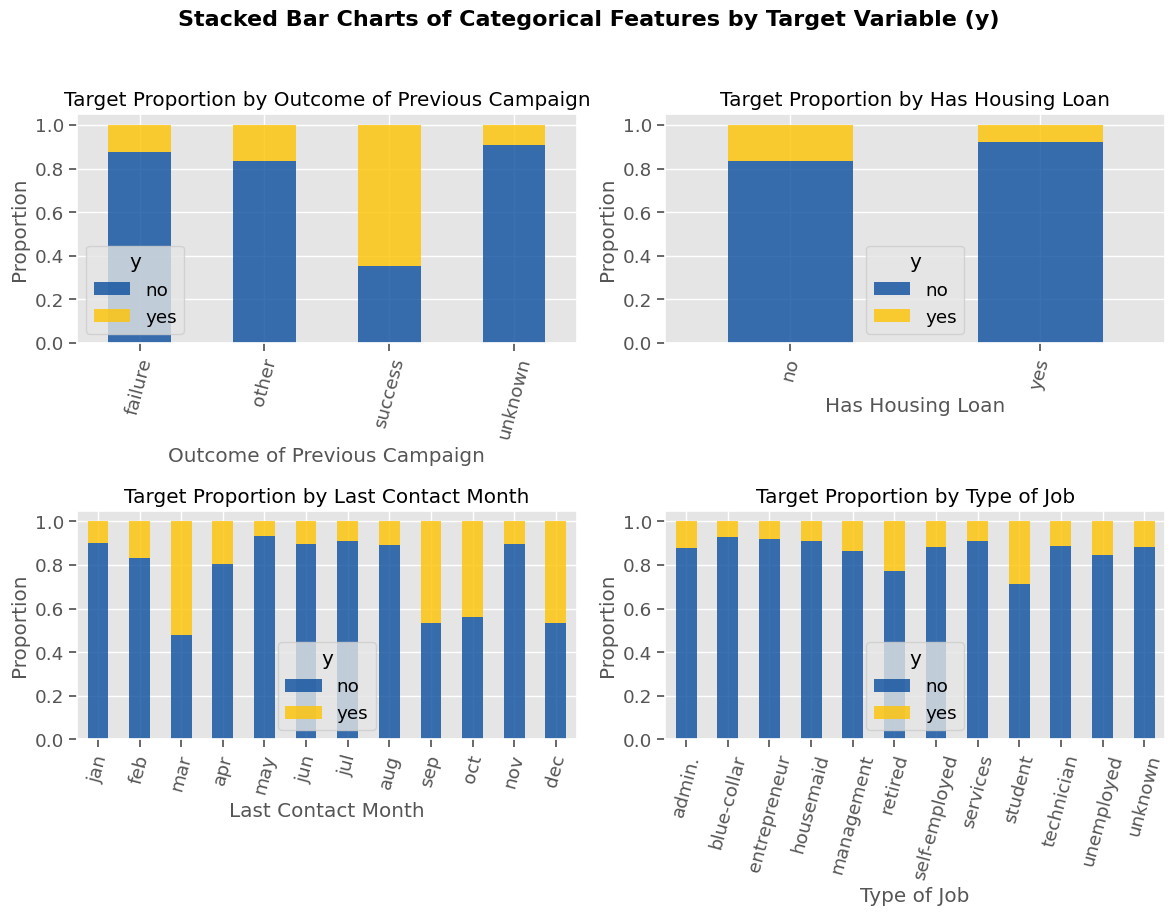

In [22]:
categoricas_sig = ['poutcome', 'housing', 'month', 'job']
category_labels = {
    'poutcome': 'Outcome of Previous Campaign',
    'housing': 'Has Housing Loan',
    'month': 'Last Contact Month',
    'job': 'Type of Job'
}

data['month'] = pd.Categorical(data['month'], categories=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], ordered=True)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9), constrained_layout=True)
fig.suptitle("Stacked Bar Charts of Categorical Features by Target Variable (y)", fontsize=16, weight="bold", y=1.02)

axs = axs.flatten()  # Asegura un acceso sencillo a los subgráficos

for i, col in enumerate(categoricas_sig):
    cross_tab = pd.crosstab(data[col], data['y'], normalize="index")
    cross_tab.plot(kind='bar', stacked=True, ax=axs[i], color=colors, alpha=0.8)
    axs[i].set_title(f'Target Proportion by {category_labels[col]}')
    axs[i].set_xlabel(f'{category_labels[col]}')
    axs[i].set_ylabel("Proportion")
    axs[i].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()
